# ニューラルネットワーク

- ニューラルネットワークでは、活性化関数としてシグモイド関数やReLU関数のような滑らかに変化する関数（非線形関数）を利用する
    - 層を重ねる恩恵を得るため。線形関数（ここではステップ関数）だと、層を重ねても意味がない
    - パーセプトロンとニューラルネットワークの違いは、利用する活性化関数の違いだけ
        - パーセプトロンは活性化関数にステップ関数を利用している
$$
y = h(b + w_1x_1 + w_2x_2) \\
h(x) = \left\{
    \begin{array}{ll}
        0 & (x <= 0) \\
        1 & (x > 0)
    \end{array}
\right.
$$
        - ニューラルネットワークは活性化関数にシグモイド関数を利用している
$$
h(x) = \frac{1}{1 + exp(-x)} \\
e = 2.7182・・・（ネイピア数）
$$
        - ニューラルネットワークは最近ではシグモイド関数の代わりにReLU関数を利用している
$$
h(x) = \left\{
    \begin{array}{ll}
        x & (x > 0) \\
        0 & (x <= 0)
    \end{array}
\right.
$$


- NumPyの多次元配列をうまく使うことで、ニューラルネットワークを効率よく実装することができる
- 機械学習の問題は、回帰問題と分類問題に大別できる
- 出力層で使用する活性化関数は、回帰問題では恒等関数(入力をそのまま出力にする関数)、２クラス分類問題ではシグモイド関数、多クラス分類問題ではソフトマックス関数を一般的に利用する
    - ソフトマックスの指数関数の計算を行う際には、何らかの定数を足し算（or引き算）しても結果は変わらない(下記式のCのこと)
    - 例として、オーバーフロー対策として、入力信号の最大の値を引くことが多い
    - ソフトマックス関数の出力は0から1の間の実数
    - ソフトマックス関数の出力の総和は1
$$
y_k = \frac{exp(a_k + C)}{\sum_{i=1}^nexp(a_i + C)}
$$


- 分類問題では、出力層のニューロンの数を分類するクラス数に設定する
    - 出力の一番大きいニューロンに相当するクラスだけを認識結果とする
    - ニューラルネットワークの分類では、出力層のソフトマックス関数を省略することができる
- 入力データのまとまりをバッチと言い、バッチ単位で推論処理を行うことで、計算を高速に行うことができる

## ステップ関数、シグモイド関数、ReLU関数、ソフトマックス関数

In [1]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    """ステップ関数"""
#     y = x > 0
#     return y.astype(np.int)
    return np.array(x > 0, dtype = np.int)


def sigmoid_function(x):
    """シグモイド関数"""
    return 1 / (1 + np.exp(-x))


def relu(x):
    """ReLU関数"""
    return np.maximum(0, x)

def softmax(x):
    """ソフトマックス関数"""
    exp_a = np.exp(x)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

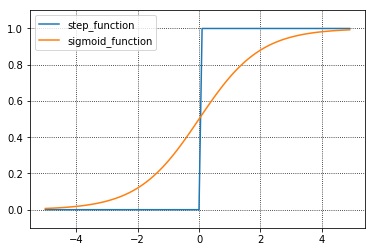

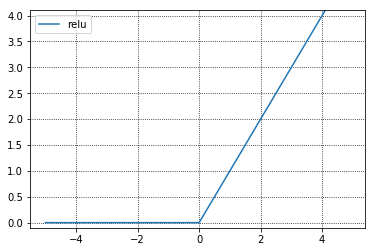

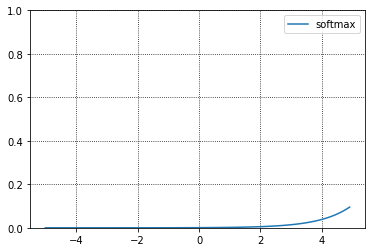

ソフトマックス関数の出力の総和：  0.9999999999999998


In [2]:
if __name__ == '__main__':
    X = np.arange(-5.0, 5.0, 0.1)
    
    Y = step_function(X)
    plt.plot(X, Y, label='step_function')

    Y = sigmoid_function(X)
    plt.plot(X, Y, label='sigmoid_function')
    
    plt.grid(which='major',color='black',linestyle=':')
    plt.grid(which='minor',color='black',linestyle=':')
    plt.legend()
    plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
    plt.show()
    
    Y = relu(X)
    plt.plot(X, Y, label='relu')
    
    plt.grid(which='major',color='black',linestyle=':')
    plt.grid(which='minor',color='black',linestyle=':')
    plt.legend()
    plt.ylim(-0.1, 4.1)  # 図で描画するy軸の範囲を指定
    plt.show()
    
    Y = softmax(X)
    plt.plot(X, Y, label='softmax')
    
    plt.grid(which='major',color='black',linestyle=':')
    plt.grid(which='minor',color='black',linestyle=':')
    plt.legend()
    plt.ylim(0, 1.0)  # 図で描画するy軸の範囲を指定
    plt.show()
    
    print('ソフトマックス関数の出力の総和： ', np.sum(Y))


## ３層ニューラルネットワーク

In [3]:
def identity_function(x):
    """恒等関数"""
    return x

def init_network():
    """重みバイアス初期化（ここでは適当な数）"""
    network = {}
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    """3層、順伝播処理"""
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 入力層
    a1 = x @ w1 + b1
    z1 = sigmoid_function(a1)
    
    # 中間層
    a2 = z1 @ w2 + b2
    z2 = sigmoid_function(a2)
    
    # 出力層
    a3 = z2 @ w3 + b3
    y = identity_function(a3)
    
    return y

In [4]:
if __name__ == '__main__':
    network = init_network()
    
    x = np.array([1.0, 0.5])
    y = forward(network, x)
    
    print(y)

[0.31682708 0.69627909]


## 手書き数字(MNISTデータ)読み込み＆お試し表示

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

    
if __name__ == '__main__':
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

    img = x_train[0]
    label = t_train[0]
    print(label)  # 5

    print(img.shape)  # (784,)
    img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
    print(img.shape)  # (28, 28)

    img_show(img)

5
(784,)
(28, 28)


## ニューラルネットワーク(MINST)

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = x @ W1 + b1
    z1 = sigmoid(a1)

    a2 = z1 @ W2 + b2
    z2 = sigmoid(a2)
    
    a3 = z2 @ W3 + b3
    y = softmax(a3)
    
    return y

In [7]:
if __name__ == '__main__':
    ### バッチ処理なし ###
    x, t = get_data()
    network = init_network()

    accuracy_cnt = 0
    for i in range(len(x)):
        y = predict(network, x[i])

        p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
        if p == t[i]:
            accuracy_cnt += 1

    print('[バッチなし]Accuracy: ' + str(float(accuracy_cnt) / len(x)))
    
    ### バッチ処理あり ###
    # バッチの数だけ一気に処理する
    x, t = get_data()
    network = init_network()

    batch_size = 100 # バッチの数
    accuracy_cnt = 0

    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = predict(network, x_batch)
        
        p = np.argmax(y_batch, axis=1)
        accuracy_cnt += np.sum(p == t[i:i+batch_size])

    print("[バッチあり]Accuracy: " + str(float(accuracy_cnt) / len(x)))

[バッチなし]Accuracy: 0.9352
[バッチあり]Accuracy: 0.9352
